# Wstęp do Sztucznej Inteligencji - rok akademicki 2017/2018

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `{NrAlbumu}_{Nazwisko}_{Imie}_{PoprzedniaNazwa}`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`. Możesz również sprawdzić czy twoje rozwiązania przechodzą wstępną walidację (Validate). 

## Temat: Sztuczne Sieci Neuronowe - Lab 1 - Perceptron
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

### Sztuczna komórka nerwowa
Za pierwszy model sieci neuronowej uważa sie zainspirowany modelem biologicznym, model neuronu zaproponowany przez W. McCullacha i W. Pittsa w 1943 roku. Był to prosty neuron zdefiniowany jako układ z pewnym progiem wrażliwości posiadającym dwa typy wejść: pobudzające i hamujące. Założono, że układ ten może przyjmować tylko dwa stany: aktywny bądź nieaktywny.
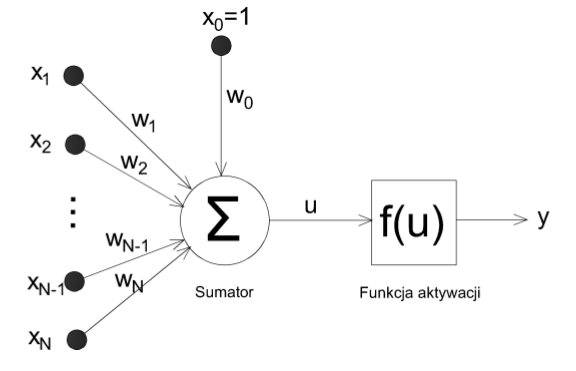

Model neuronu McCullacha-Pittsa przedstawiony na powyższym rysunku, można opisać zależnością
$$y = f\left(\sum\limits_{i=1}^N{w_ix_i}+w_0\right)$$
gdzie:

- funkcja $f(\cdot)$ jest funkcją aktywacji neuronu,
- wartości $x_i$ są sygnałami wejściowymi,
- współczynniki $w_i$ są wagami połączeń synaptycznych,
- współczynnik $w_0$ jest progiem wrażliwości neuronu (tzw. biasem).

W oryginalnym modelu McCullocha-Pittsa jako funkcji aktywacji użyto funkcji skokowej, a dokładniej pseudofunkcji Heaviside’a
$$ f(u) = \left\{\begin{array}{l}
1, \quad u \geq 0,\\
0, \quad u<0.\end{array}\right.$$

### Perceptron
Model neuronu McCullacha-Pittsa opisany powyżej z odpowiednio dobraną strategią uczenia nazywany jest _perceptronem Rosenblatta_ lub krótko _perceptronem_.

Niech wektory sygnałów wejściowych oraz wartości wag będą odpowiednio postaci $x = [1, x_1, x_2, \ldots, x_N]$ oraz
$w = [w_0, w_1, \ldots, w_N]$. Do wektora $x$ dołączono składową zerową $x_0 = 1$, stanowiącą sygnał polaryzacji, natomiast wartość wagi $w_0$ jest progiem wrażliwości neuronu (biasem). 

Wówczas model perceptronu możemy zapisać w postaci
$$y = f(u) = f\left(\sum\limits_{i=0}^N{w_ix_i}\right)$$

### Zastosowania prerceprtronu
Perceptron na wyjściu zgodnie z funkcją aktywacji może przyjmować tylko dwie wartości 0 lub 1, wobec tego może on zostać wykorzystany do klasyfikacji wzorców pochodzących z dwóch różnych klas. Jeśli wartość sumatora jest dodatnia to wzorzec zostanie zaklasyfikowany do klasy 1, w przeciwnym przypadku będzie to klasa 0.

Rozważmy problem w przestrzeni dwuwymiarowej ($N = 2$), wówczas perceptron odseparowuje klasy od siebie za pomocą linii prostej (w dowolnym wymiarze jest to ($N − 1$)-wymiarowa hiperpłaszczyzna) danej równaniem
$$w_0x_0+w_1x_1+w_2x_2=0,$$
co można zapisać w postaci równania kierunkowego prostej
$$x_2=-\frac{w_1}{w_2}x_1-\frac{w_0}{w_2}.$$
Na poniższym rysunku przedstawiona jest interpretacja geometryczna działania perceptronu w przypadku dwuwymiarowym, widzimy, że wagi sygnałów wejściowych wyznaczają nachylenie prostej, natomiast bias odpowiedzialny jest za przesunięcie prostej.
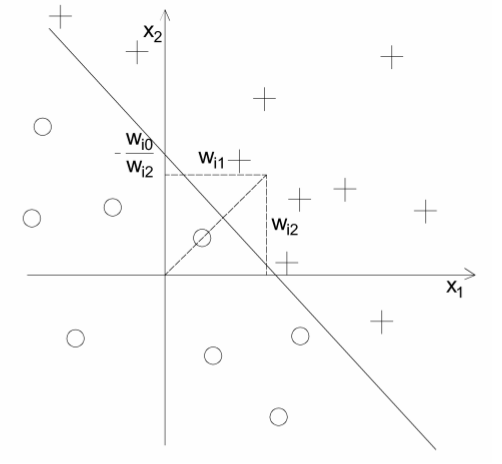

### Uczenie perceptronu
Uczenie perceptronu należy do grupy uczenia z nauczycielem i polega na takim doborze wektora wag $w$, aby sygnał wyjściowy neuronu $y$ były najbliżej wartości pożądanej $d$. Najpopularniejszą metodą uczenia perceptronu jest tzw. _reguła perceptronu_, którą można opisać w postaci kilku kroków.

Załóżmy, że dysponujemy zbiorem wektorów uczących postaci $\{x^{(0)}, x^{(1)}, \ldots, x^{(P)}\}$ oraz odpowiadającym mu zbiorem wartości pożądanych $\{d^{(0)}, d^{(1)},\ldots, d^{(P)}\}$.

#### Reguła perceptronu
1. Ustalamy $t = 0$.
2. Ustalamy w sposób losowy początkowe wartości wektora wag $w$.
3. Prezentujemy na wejścia perceptronu wektor uczący $x^{(t)}$.
4. Obliczamy odpowiedź perceptronu $y$ zgodnie z wzorem $y = f\left(\sum\limits_{i=0}^N{w_ix^{(t)}_i}\right)$
5. Porównujemy odpowiedź perceptronu $y$ z pożądaną odpowiedzią $d^{(t)}$.
6. Modyfikujemy wartości wag według poniższych reguł, parametr $\eta\in(0,1)$ to _współczynnuk uczenia_:
   - jeśli $y = d^{(t)}$ to wagi pozostają niezmienione,
   - jeśli $y = 0$, a $d^{(t)}=1$ to $w_i = w_i + \eta x_i^{(t)}$,
   - jeśli $y = 1$, a $d^{(t)}=0$ to $w_i = w_i - \eta x_i^{(t)}$.
7. Jeżeli warunek zatrzymania nie jest spełniony, to ustalamy $t = t + 1$ i wracamy do kroku 3, w przeciwnym przypadku kończymy algorytm.

Wykonanie powyższej procedury dla wszystkich wektorów uczących nazywamy _epoką uczenia_. W przypadku uczenia perceptronu wykonujemy tyle epok, aż wszystkie przykłady uczące będą dobrze sklasyfikowane lub błąd klasyfikacji będzie dostatecznie mały. Stabilność oraz szybkość uczenia tym algorytmem w istotny sposób zależy od doboru
parametru $\eta$. Współczynnik ten dobierany jest najczęściej w sposób empiryczny.

Przykładowy przebieg uczenia dla danych `2D.csv`:
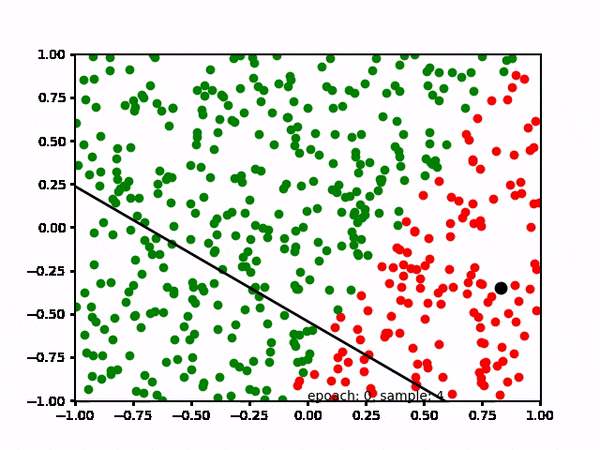

## Zadanie 1:
Zaimplementuj model preceptronu w postaci klasy.

In [1]:
import numpy as np

class Perceptron:
    # Inicjalizator, ustawiający atrybut self.w jako wektor losowych wag, n ilość sygnałów wejściowych
    def __init__(self, n):
        # YOUR CODE HERE
        self.w = np.random.rand(n)

        
    # Metoda obliczająca odpowiedz modelu dla zadanego sygnału wejściowego x=[1,x1,x2,...,xN]
    def predict(self, x):
        arg = np.dot(x, self.w)
        return 1 if arg >= 0 else 0
        
    # Metoda uczenia według reguły perceptronu, xx - zbiór danych uczących, d - odpowiedzi,
    # eta - współczynnik uczenia,
    # tol - tolerancja (czyli jak duży błąd jesteśmy w stanie zaakceptować) 
    def train(self, xx, d, eta, tol):
        matched_results = zip(xx, d)
        
        while self.evaluate_test(xx, d) > tol:
            for (row, desired_value) in matched_results:
                self.learn_and_evaluate_single_example(row, desired_value, eta)

    def learn_and_evaluate_single_example(self, row, desired_value, eta):
            response = self.predict(x_t)
            if response == 0 and d == 1:
                w = w + (row * eta)
            elif response == 1 and d == 0:
                w = w - (row * eta)
        
        
    # Metoda obliczająca błąd dla danych testowych xx
    # zwraca błąd oraz wektor odpowiedzi perceptronu dla danych testowych
    def evaluate_test(self, xx, d):
        matched = zip(xx, d)
        errors = 0
        responses = []
        for (x, desired_value) in matched:
            result = self.predict(x)
            if desired - result != 0:
                errors = errors + 1
            responses.push(result)
            
        return errors, responses
        

## Zadanie 2:
- Stwórz dwa obiekty klasy `Perceptron`. 
- Wczytaj dane z plików `2D.csv` oraz `3D.csv.`
- Pierwszy z perceptronów naucz klasyfikować dane z pliku `2D.csv`, ucz tylko na losowej części danych (np. 80%)
- Drugi z perceptronów naucz klasyfikować dane z pliku `3D.csv`, ucz tylko na losowej części danych (np. 80%)
- Oba zbiory danych są przykładami problemów liniowo separowalnych, a więc należy uczyć modele tak aby uzyskiwać dla danych uczących błąd równy zero.
- Przedstaw rezultaty uczenia na wykresach, odpowiednio 2D lub 3D. Na wykresach powinny znaleźć się dane testowe, tzn. te które nie były wykorzystywane w trakcie uczenia oraz linia (płaszczyzna) rozdzielająca klasy.

<div style="text-align: right">&copy; Zakład Inteligencji Obliczeniowej, Instytut Informatyki, Politechnika Krakowska </div>